In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

df=pd.read_csv('vgsales.csv')

In [2]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [3]:
df.shape

(16598, 11)

In [4]:
df.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

In [5]:
df.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

#here we can see that there are null values in Year and publisher

We need to know how many values are missing? So Here, We use some calculations to show the percentage values of missing values features.

In [6]:
(df.isna().sum() * 100) / df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

## Here the percentage in year is 1.63% and in publisher is 0.34%


Separate the Numerical And Categorical Features

In [7]:
# Creating Categorical DataFrame
categorical_df = df.select_dtypes('O')

categorical_df.head()

Name Platform         Genre Publisher
0                Wii Sports      Wii        Sports  Nintendo
1         Super Mario Bros.      NES      Platform  Nintendo
2            Mario Kart Wii      Wii        Racing  Nintendo
3         Wii Sports Resort      Wii        Sports  Nintendo
4  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo

In [8]:
#Creating Numerical Dataframe
numerical_df = df.select_dtypes(('int', 'float'))

numerical_df.head()

Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1  2006.0     41.49     29.02      3.77         8.46         82.74
1     2  1985.0     29.08      3.58      6.81         0.77         40.24
2     3  2008.0     15.85     12.88      3.79         3.31         35.82
3     4  2009.0     15.75     11.01      3.28         2.96         33.00
4     5  1996.0     11.27      8.89     10.22         1.00         31.37

In [9]:
categorical_features = categorical_df.columns
print(categorical_features)

print('-' * 60)

numerical_features = numerical_df.columns
print(numerical_features)

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')
------------------------------------------------------------
Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')


## Analysis for Categorical Features & check the most repetitive values.

In [10]:
# Categorical Features Normalization

for category_name in categorical_features:
    print('-' * 50)
    print("Column Name: ", category_name)
    
    print(' ' * 50)
    print(df[category_name].value_counts().head())
    
    print('-' * 50)
    print('-' * 50)

--------------------------------------------------
Column Name:  Name
                                                  
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Name: Name, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Platform
                                                  
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Genre
                                                  
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64
--------

## Data Cleaning and Remove NaN values.

In [11]:
#  Remove Null Values

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
df[['Year', 'Publisher']].describe(include='all')

Year        Publisher
count   16327.000000            16540
unique           NaN              578
top              NaN  Electronic Arts
freq             NaN             1351
mean     2006.406443              NaN
std         5.828981              NaN
min      1980.000000              NaN
25%      2003.000000              NaN
50%      2007.000000              NaN
75%      2010.000000              NaN
max      2020.000000              NaN

In [13]:
## Here we fill the missing values with the mean values but you can also replace them with median value.
df.Year = df.Year.fillna(df.Year.mean())

In [14]:
# Change Year dtype to int32

df.Year = df.Year.astype('int32')
df.Year

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

## Filling missing values of Publisher
Here, Publisher is a categorical feature so we need to fill the missing values with values which is most repetitive.

So, We use the .value_counts() methods to get the value which is continue repeating.

In [15]:
df.Publisher.value_counts(normalize=True)

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Warp                            0.000060
New                             0.000060
Elite                           0.000060
Evolution Games                 0.000060
UIG Entertainment               0.000060
Name: Publisher, Length: 578, dtype: float64

In [16]:
##To replace value we can use mode to get 'Electronic Arts'.
df.Publisher = df.Publisher.fillna(df.Publisher.mode()[0])

In [17]:
#Checking the datatype of both the variables
df[['Publisher','Year']].dtypes

Publisher    object
Year          int32
dtype: object

In [18]:
# Get Top 10 Video Games Publishers
top_10_publishers = df.Publisher.value_counts().head(10)

px.bar(top_10_publishers, title='Top 10 Video Game Pubishers', 
       labels={
           'value': "Number of Games Publishing",
           'index': "Name of the Publisher"
       })

In [19]:
import plotly.express as px

# Create a line graph
fig = px.line(top_10_publishers, 
              title='Top 10 Video Game Publishers', 
              labels={
                  'value': "Number of Games Publishing",
                  'index': "Name of the Publisher"
              })

# Show the graph
fig.show()


## Showing top 10 Video Games Genres that has most playing video games using bar and scatter plots

In [20]:
# Get Top 10 Video Games Genre
top_10_generes = df.Genre.value_counts()
# top_10_generes

fig =px.bar(top_10_generes, title='Top 10 Video Game Genres',
       labels={
           'value': "Number of Games Genres",
           'index': "Name of the Genre"
       })

fig.show()


fig = px.scatter(top_10_generes, title='Top Gernres Games',
              labels={
                   'value': "Numbers",
                   'index': "Genre"
               })
fig.show()



px.bar(top_10_generes.index, top_10_generes.values, title='Top 10 Video Game Genres', 
  labels={
      'value': "Numbers",
      'index': "Genre"
     })

## Showing top 10 Playing Video games Platforms using line plots

In [21]:
# Get Top 10 Video Games Genre
top_10_platform = df.Platform.value_counts().sort_values()
top_10_platform

fig = px.line(top_10_platform, title='Top Playing Platforms',
              labels={
                   'value': "Counts",
                   'index': "Name of the Platform"
               })

# fig = go.Figure(data=go.Scatter(x= top_10_platform.index, y=top_10_platform.values,
#                                title="Top Playing Platforms"))

fig.show()

In [22]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

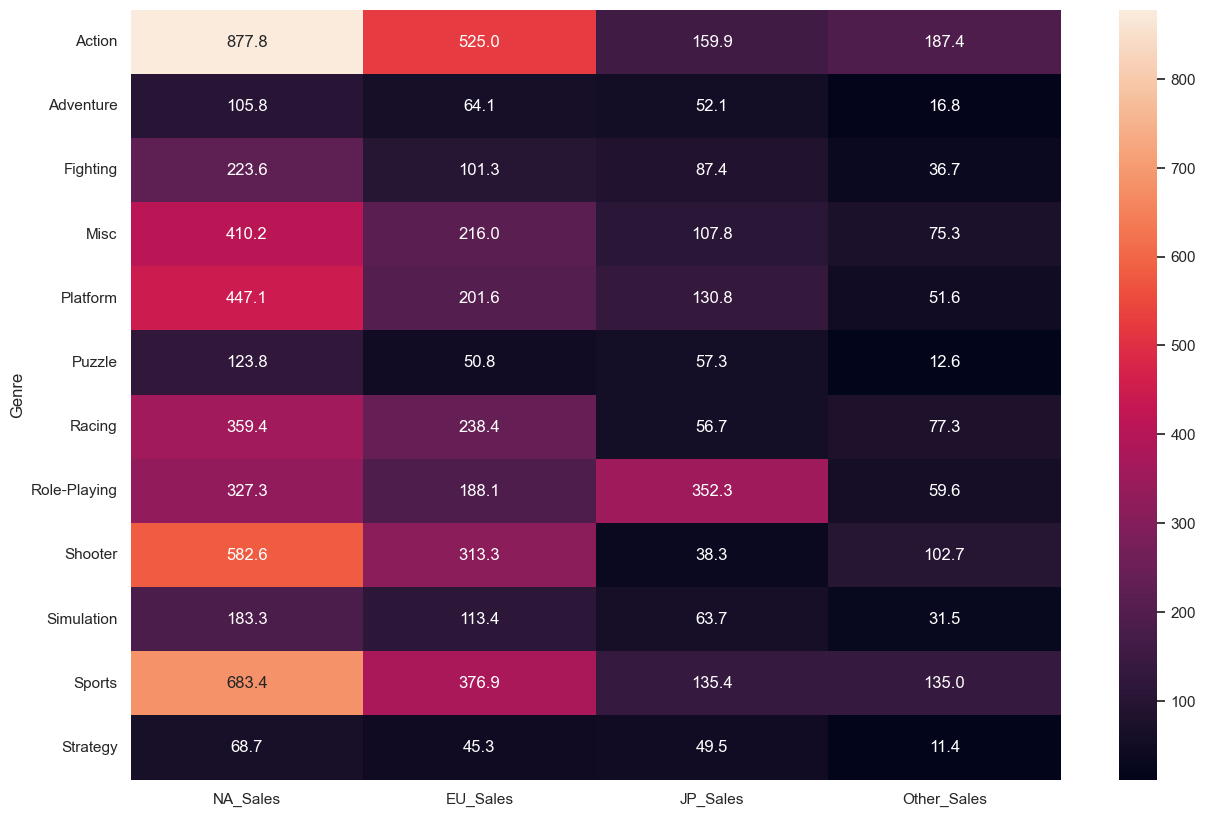

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
plt.figure(figsize=(15, 10))

# Set the font size of the plot
sns.set(font_scale=1)

# Create a heatmap with annotations and a specific format
sns.heatmap(comp_map, annot=True, fmt='.1f')

# Show the plot
plt.show()


In [24]:
data_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006      Wii        Sports     41.49     29.02         8.46
1      1985      NES      Platform     29.08      3.58         0.77
2      2008      Wii        Racing     15.85     12.88         3.31
3      2009      Wii        Sports     15.75     11.01         2.96
4      1996       GB  Role-Playing     11.27      8.89         1.00
...     ...      ...           ...       ...       ...          ...
16593  2002      GBA      Platform      0.01      0.00         0.00
16594  2003       GC       Shooter      0.01      0.00         0.00
16595  2008      PS2        Racing      0.00      0.00         0.00
16596  2010       DS        Puzzle      0.00      0.01         0.00
16597  2003      GBA      Platform      0.01      0.00         0.00

[16598 rows x 6 columns]

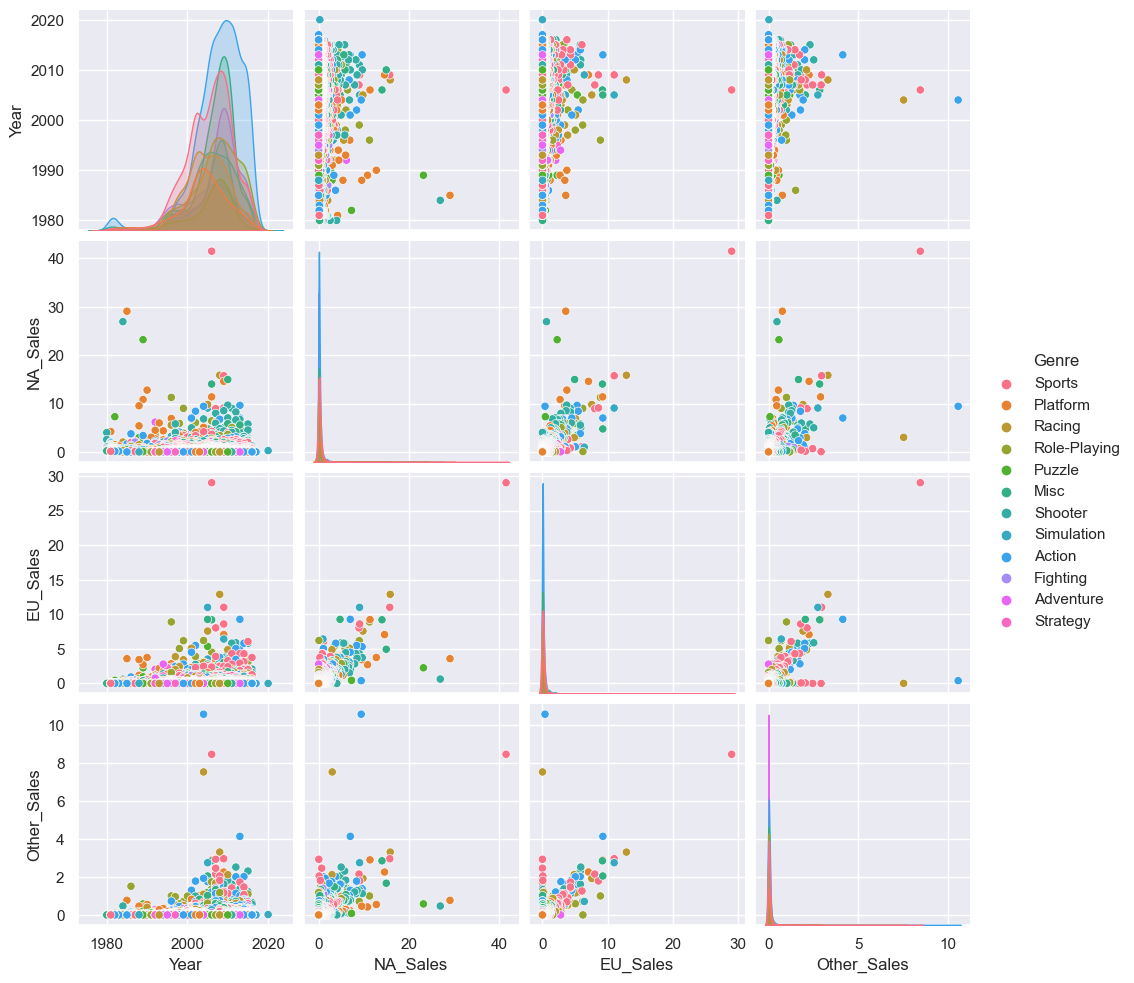

In [25]:
sns.pairplot(data_pair, hue='Genre')

## Showing Most repeting word in the dataset for all Categorical values like 'Name', 'Publisher', 'Platform' and 'Genre'.

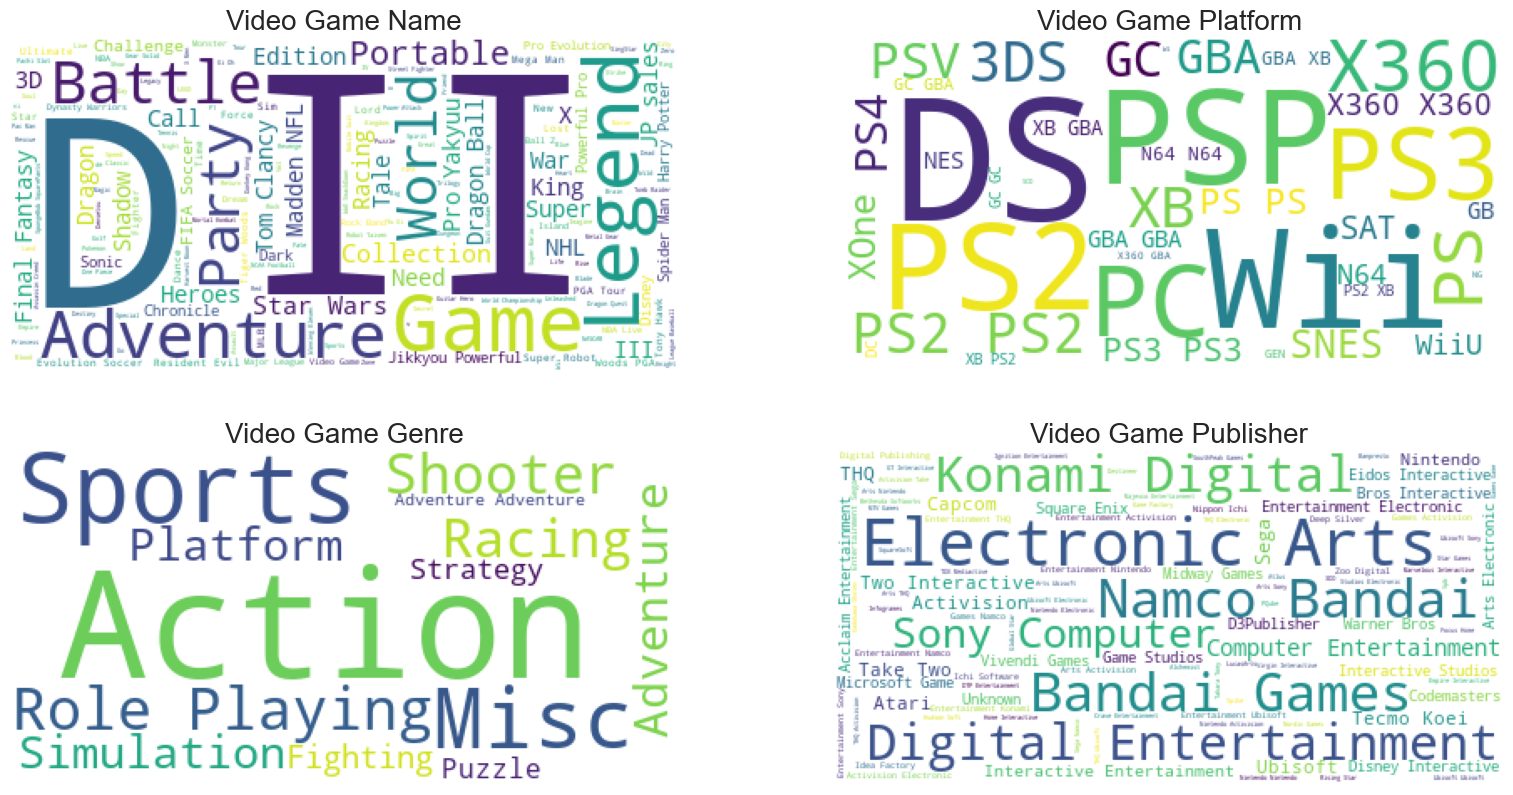

In [26]:
from wordcloud import WordCloud, STOPWORDS


global_sales = df.sort_values(by='Other_Sales', ascending=False)

# plt.subplot(1, 2, 1)


fig = plt.figure(figsize=(17,17))


for index, col,  in enumerate(categorical_features):
    
    plt.subplot(len(categorical_features), 2, index + 1)
    
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color='white'
    ).generate(" ".join(global_sales[col]))

    # Show WordCloud Image
    
    
    plt.imshow(wordcloud)
    plt.title("Video Game " + col, fontsize=20)
    plt.axis('off')
    plt.tight_layout(pad=3)

plt.show()

## Displaying the correlation for the numerical feature.

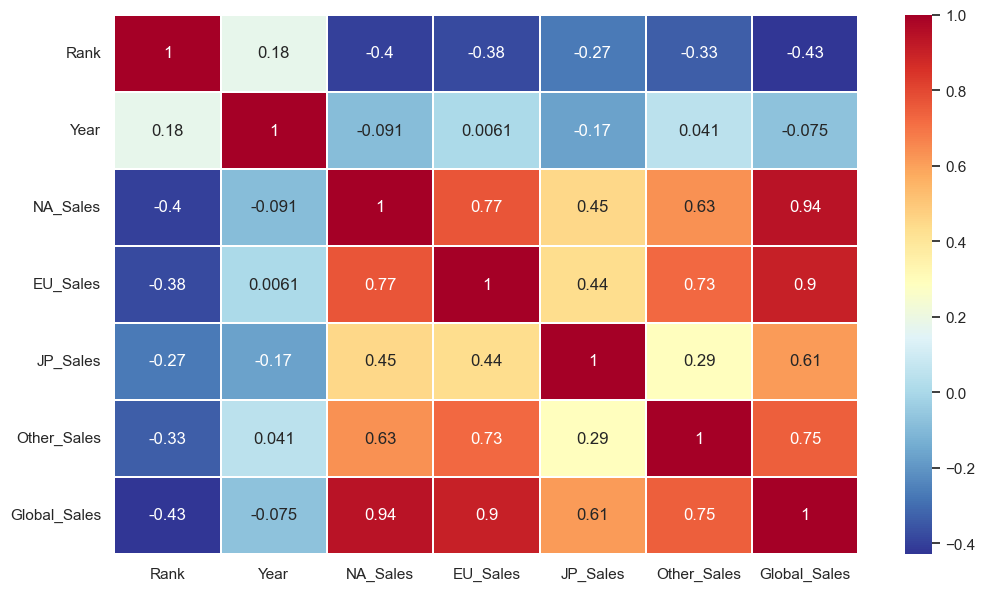

In [27]:
corr_ = df.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()

le = LabelEncoder()

In [29]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [30]:
feature = ["Platform", "Genre"]


for col in feature:
    data[col] = le.fit_transform(df[col])

In [31]:
##Let's create train and target feature for train and test splites

X = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = data['Global_Sales'].values


In [32]:
X[:5], y[:5]

(array([[26.  , 10.  , 41.49, 29.02,  3.77,  8.46],
        [11.  ,  4.  , 29.08,  3.58,  6.81,  0.77],
        [26.  ,  6.  , 15.85, 12.88,  3.79,  3.31],
        [26.  , 10.  , 15.75, 11.01,  3.28,  2.96],
        [ 5.  ,  7.  , 11.27,  8.89, 10.22,  1.  ]]),
 array([82.74, 40.24, 35.82, 33.  , 31.37]))

## Splite the data into Train and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=45)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8299, 6), (8299,), (8299, 6), (8299,))

## Model Selection


In [35]:
from sklearn.linear_model import LinearRegression

# Import r2 score for Calculation
from sklearn.metrics import r2_score

In [36]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

r2_MultiLinear = r2_score(y_test,pred)

In [37]:
print(r2_MultiLinear)

print(lr.score(X_test, y_test))

0.9999905762455319
0.9999905762455319


## Implementing KNeighbor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(y_test,pred))

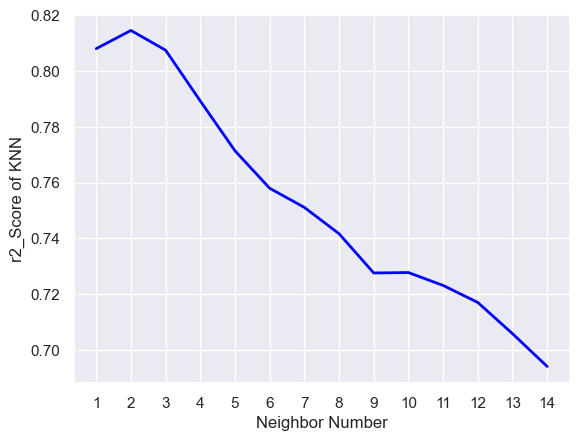

In [39]:
plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()

In [40]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.8074594173028711


## Implementing Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=32)
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

print(r2_score(y_test, pred))

0.8108406866676034


## Implementing RandomForest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state= 10)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

print(r2_score(y_test, pred))

0.8193725676206671


## Implementing SVM

In [43]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')

svr_rbf = SVR(kernel='rbf')
svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

pred_linear = svr_linear.predict(X_test)
pred_rbf = svr_rbf.predict(X_test)

print(r2_score(y_test, pred_linear))
print(r2_score(y_test, pred_rbf))

0.9978179305634568
0.6253882726127944


## Implementing XGBoost

In [44]:


from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

print(r2_score(y_test, pred))

0.8502493160898199
